In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('mpg')

In [3]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, learning_rate = .006)

initial loss:  884.2003173828125
nllk loss:  tensor(878.9797, grad_fn=<MeanBackward0>) kernel loss: tensor(1.7402, grad_fn=<AddBackward0>)
nllk loss:  tensor(402.0835, grad_fn=<MeanBackward0>) kernel loss: tensor(6.7503, grad_fn=<AddBackward0>)
nllk loss:  tensor(183.9481, grad_fn=<MeanBackward0>) kernel loss: tensor(16.9158, grad_fn=<AddBackward0>)
nllk loss:  tensor(128.8448, grad_fn=<MeanBackward0>) kernel loss: tensor(10.1093, grad_fn=<AddBackward0>)
nllk loss:  tensor(99.5096, grad_fn=<MeanBackward0>) kernel loss: tensor(5.7351, grad_fn=<AddBackward0>)
nllk loss:  tensor(79.1119, grad_fn=<MeanBackward0>) kernel loss: tensor(7.8697, grad_fn=<AddBackward0>)
nllk loss:  tensor(66.7421, grad_fn=<MeanBackward0>) kernel loss: tensor(4.6496, grad_fn=<AddBackward0>)
nllk loss:  tensor(57.3752, grad_fn=<MeanBackward0>) kernel loss: tensor(9.3697, grad_fn=<AddBackward0>)
nllk loss:  tensor(53.9809, grad_fn=<MeanBackward0>) kernel loss: tensor(2.6311, grad_fn=<AddBackward0>)
nllk loss:  tens

nllk loss:  tensor(4.6851, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5119, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6383, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3509, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9195, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3117, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9119, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7511, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9489, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4883, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1074, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9041, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8909, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4744, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.7753, grad_fn=<MeanBackward0>) kernel loss: tensor(1.7127, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1226, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0632, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0188, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.7957, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7296, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8257, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8225, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.6818, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4985, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8303, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1865, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8145, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0652, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8814, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5700, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8228, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4285, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8022, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7669, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7707, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9545, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8151, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.4695, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8314, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4509, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7132, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4815, grad_fn=<MeanBackward0>) kernel loss: tensor(1.6080, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4804, grad_fn=<MeanBackward0>) kernel loss: tensor(1.5006, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4463, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3245, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4316, grad_fn=<MeanBackward0>) kernel loss: tensor(1.2894, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4353, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1117, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5232, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1324, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5296, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1180, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4950, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.2917, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6903, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3488, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0943, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3372, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0265, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3177, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3676, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3239, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5725, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3355, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0732, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3173, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5220, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3319, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7912, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3347, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3594, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2972, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.1370, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9176, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1462, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6617, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1578, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1119, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2042, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5628, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2124, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3283, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1485, grad_fn=<MeanBackward0>) kernel loss: tensor(1.5844, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1231, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0774, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1139, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1398, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1341, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0299, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1733, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(2.9408, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8954, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9351, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1231, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0272, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1471, grad_fn=<MeanBackward0>) kernel loss: tensor(1.5376, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2595, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6063, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0199, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0077, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0185, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3304, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9405, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5197, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9503, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2813, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9137, grad_fn=<MeanBackward0>) kernel loss: ten

nllk loss:  tensor(2.8500, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9647, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8408, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0449, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8070, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1584, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8275, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0611, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9361, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8913, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1816, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8236, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3986, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8660, grad_fn=<MeanBackward0>) kernel loss: tensor(1.2576, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8641, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8156, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8871, grad_fn=<MeanBackward0>) kernel loss: ten

End2end test MAPE:  0.08289827
End2end test RMSE:  2.7714534
End2end test NLLK:  2.782788
End2end test CRPS:  tensor(1.4243)


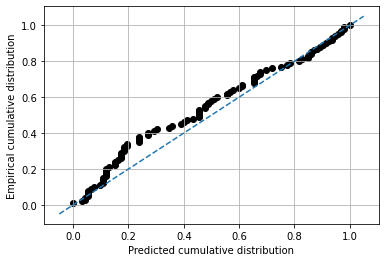

End2end test calibration error when step size is 0.001:  4.352553875236295
End2end test calibration error when step size is 0.01:  0.4383931947069944
End2end test calibration error when step size is 0.1:  0.0474716446124764


In [4]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [5]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.86it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.83it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.58it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           1.944
  RMSE          2.771
  MDAE          1.209
  MARPD         8.217
  R2            0.865
  Correlation   0.931
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.050
  Mean-absolute Calibration Error       0.042
  Miscalibration Area                   0.042
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.179
     Group Size: 0.56 -- Calibration Error: 0.084
     Group Size: 1.00 -- Calibration Error: 0.042
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.220
     Group Size: 0.56 -- Calibration Error: 0.094
     Group Size: 1.00 -- Calibration Error: 0.050
================

Lims is None. Setting lims now:
min_max_true: (11.0, 46.6)
min_max_pred: (11.634403, 37.756554)
lims: (11.0, 46.6)
lims_ext: (7.44000015258789, 50.1599983215332)


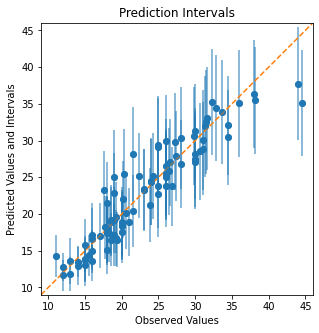

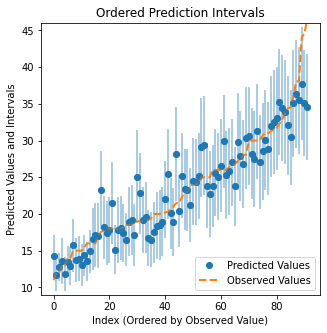

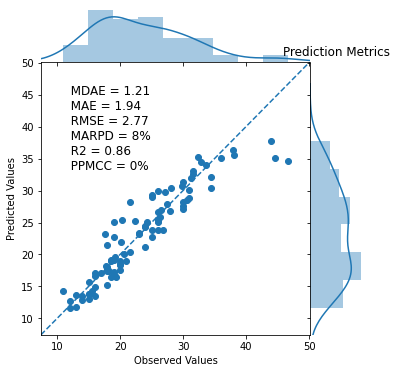

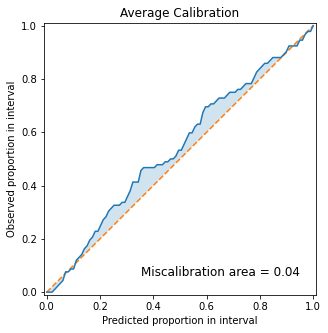

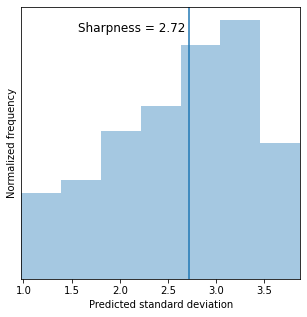

In [6]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))